<a href="https://colab.research.google.com/github/LaraAyrolla/Python-Projects/blob/main/simple-lists/pandas/Pandas-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trabalhando com APIs**

##### **Aluna: Lara Luísa Ayrolla Abreu**

In [ ]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

baseUrl = 'https://viacep.com.br/ws/'

In [ ]:
# Crie um código Python que solicite ao usuário que informe 5 CEPs.
# Armazene os CEPs em uma lista. Em seguida, percorra a lista e,
# para cada CEP, liste os seguintes dados (utilizando a API ViaCEP):

  # CEP: CEP
  # Logradouro: Logradouro
  # Complemento: Complemento
  # Bairro: Bairro
  # Localidade: Localidade
  # UF: UF

ceps = []
format = '/json/'

for x in range(1, 6):
  print('CEP', x)
  ceps.append(input())

for cep in ceps:
  print()
  res = requests.get(baseUrl + cep + format)
  if (res.status_code == 200):
    res_list = '[' + res.text + ']'
    df = pd.read_json(res_list)
    print('CEP: %s' % df.loc[0]['cep'])
    print('Logradouro: %s' % df.loc[0]['logradouro'])
    print('Complemento: %s' % df.loc[0]['complemento'])
    print('Bairro: %s' % df.loc[0]['bairro'])
    print('Localidade: %s' % df.loc[0]['localidade'])
    print('UF: %s' % df.loc[0]['uf'])
  else:
    print('CEP inválido:', cep)

CEP 1
30140071
CEP 2
blank space
CEP 3
30642130
CEP 4
shake it off
CEP 5
30411262

CEP: 30140-071
Logradouro: Rua dos Aimorés
Complemento: de 971/972 a 1399/1400
Bairro: Boa Viagem
Localidade: Belo Horizonte
UF: MG

CEP inválido: blank space

CEP: 30642-130
Logradouro: Rua Antônio Ferreira Maia
Complemento: 
Bairro: Santa Helena (Barreiro)
Localidade: Belo Horizonte
UF: MG

CEP inválido: shake it off

CEP: 30411-262
Logradouro: Rua Turquesa
Complemento: de 1201/1202 ao fim
Bairro: Prado
Localidade: Belo Horizonte
UF: MG


In [ ]:
# Modifique o seguinte código para retornar a resposta da requisição
# "GET" em formato XML:

cep = '30140071'
format = '/xml/'
res = requests.get(baseUrl + cep + format)
if (r.status_code == 200):
  print()
  print('XML:', res.text)
  print()
else:
  print('Nao houve sucesso na requisicao.')


XML: <?xml version="1.0" encoding="UTF-8"?>
<xmlcep>
  <cep>30140-071</cep>
  <logradouro>Rua dos AimorÃ©s</logradouro>
  <complemento>de 971/972 a 1399/1400</complemento>
  <bairro>Boa Viagem</bairro>
  <localidade>Belo Horizonte</localidade>
  <uf>MG</uf>
  <ibge>3106200</ibge>
  <gia></gia>
  <ddd>31</ddd>
  <siafi>4123</siafi>
</xmlcep>



In [ ]:
# Modifique o código anterior para que a consulta seja feita com um endereço
# (nome de rua), ao invés do CEP

state = 'MG'
city = 'Belo Horizonte'
street = 'Avenida Perimetral Sul'
format = '/json/'
url = baseUrl + state + '/' + city + '/' + street + format

res = requests.get(url)
if (res.status_code == 200):
  print()
  print('JSON:', res.text)
  print()
else:
  print('Nao houve sucesso na requisicao.')


JSON: [
  {
    "cep": "31255-040",
    "logradouro": "Avenida Perimetral Sul",
    "complemento": "",
    "bairro": "São Francisco",
    "localidade": "Belo Horizonte",
    "uf": "MG",
    "ibge": "3106200",
    "gia": "",
    "ddd": "31",
    "siafi": "4123"
  }
]



In [ ]:
# Solicite ao usuário que informe o estado, a cidade e o nome de uma rua.
# Realize uma consulta desses dados através da API ViaCep, e armazene o
# resultado da consulta em um DataFrame Pandas.

state = input('Digite o estado: ')
city = input('Digite a cidade: ')
street = input('Digite o nome da rua: ')
format = '/json/'
url = baseUrl + state + '/' + city + '/' + street + format

res = requests.get(url)
if (res.status_code == 200):
  df = pd.read_json(res.text)
else:
  print('Nao houve sucesso na requisicao.')

Digite o estado: MG
Digite a cidade: Belo Horizonte
Digite o nome da rua: Mario Werneck


In [ ]:
# Mostre em seguida o conteúdo do DataFrame criado.

print(df)

         cep                       logradouro          complemento   bairro  \
0  30575-180  Avenida Professor Mário Werneck  de 1925/1926 ao fim  Buritis   
1  30455-610  Avenida Professor Mário Werneck        até 1923/1924  Estoril   

       localidade  uf     ibge gia  ddd  siafi  
0  Belo Horizonte  MG  3106200       31   4123  
1  Belo Horizonte  MG  3106200       31   4123  


In [ ]:
# Solicite ao usuário que informe o código de duas moedas.
# Códigos possíveis em https://economia.awesomeapi.com.br/xml/available/uniq
# Solicite também que informe uma quantidade de dias.
# Faça uma consulta na API AwsomeAPI (https://docs.awesomeapi.com.br/api-de-moedas)
# que retorne a cotação das duas moedas, em Reais, nos últimos dias de acordo
# com a quantidade de dias informados.

currency1 = input('Digite uma moeda: ')
currency2 = input('Digite outra moeda: ')
days = input('Digite a quantidade de dias: ')

dateToday = datetime.date.today()
endDate = dateToday.strftime("%Y%m%d")

daysTimeDelta = datetime.timedelta(days = int(days))
startDate = dateToday - daysTimeDelta
startDate = startDate.strftime("%Y%m%d")

baseUrl = 'https://economia.awesomeapi.com.br/'
endUrl = '/' + '100' + '?start_date=' + startDate + '&end_date=' + endDate
url = baseUrl + 'json/daily/' + currency1 + '-' + currency2 + endUrl

res = requests.get(url)
if (res.status_code == 200):
  df = pd.read_json(res.text)
  print('Sucesso na requisicao!')
else:
  print('\nNao houve sucesso na requisicao.')
  print('Resposta da API: %s' % res.text)

Digite uma moeda: ARS
Digite outra moeda: BRL
Digite a quantidade de dias: 10
Sucesso na requisicao!


In [ ]:
print(df)

  code codein                            name    high     low  varBid  \
0  ARS    BRL  Peso Argentino/Real Brasileiro  0.0195  0.0193  0.0000   
1  NaN    NaN                             NaN  0.0195  0.0193  0.0000   
2  NaN    NaN                             NaN  0.0194  0.0194  0.0000   
3  NaN    NaN                             NaN  0.0194  0.0194  0.0000   
4  NaN    NaN                             NaN  0.0197  0.0197  0.0000   
5  NaN    NaN                             NaN  0.0197  0.0197  0.0000   
6  NaN    NaN                             NaN  0.0201  0.0201  0.0000   
7  NaN    NaN                             NaN  0.0202  0.0198 -0.0002   
8  NaN    NaN                             NaN  0.0202  0.0201  0.0000   

   pctChange     bid     ask           timestamp          create_date  
0       0.00  0.0193  0.0194 2023-06-16 20:59:37  2023-06-16 17:59:37  
1       0.00  0.0194  0.0194 2023-06-16 20:59:17                  NaN  
2       0.00  0.0194  0.0194 2023-06-15 23:59:37     

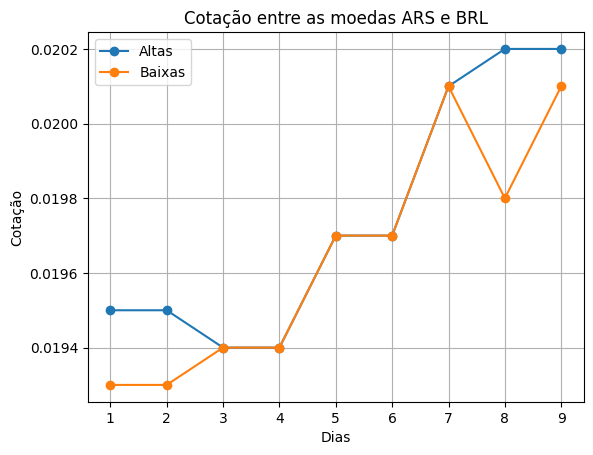

In [ ]:
# Em seguida, plote um gráfico sobreposto, mostrando a variação da cotação
# das duas moedas de acordo com os dados retornados pela API.

xDays = []
for x in range(1, len(df.index)+1):
  xDays.append(x)

plt.rcdefaults()

plt.plot(xDays, df['high'], label = "Altas", marker = 'o')
plt.plot(xDays, df['low'], label = "Baixas", marker = 'o')

plt.title('Cotação entre as moedas ' + currency1 + ' e ' + currency2)
plt.ylabel("Cotação")
plt.xlabel("Dias")
plt.grid()
plt.legend();